In [1]:
import matplotlib.pyplot as plt
import math

In [2]:
timeDecay = 11
def alpha(t):
    if t > 0:
        return (t / timeDecay) * math.exp(1 - (t/timeDecay))
    else:
        return 0

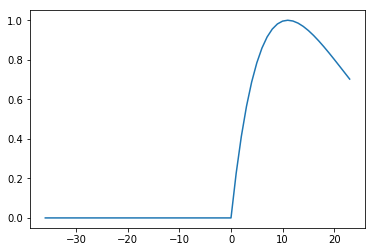

In [16]:
xs = range(-36, 24)
ys = list(map(alpha, xs))
plt.plot(xs, ys)
plt.show()

In [17]:
def positive_alpha(t):
    return (t / timeDecay) * math.exp(1 - (t/timeDecay))

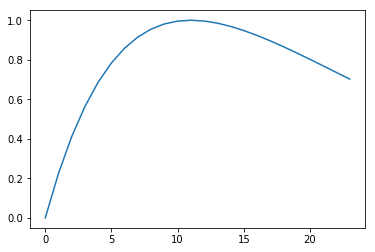

In [12]:
xs = range(0, 24)
ys = list(map(alpha, xs))
plt.plot(xs, ys)
plt.show()

In [43]:
def taylor_exp(degree, v):
    return exp(x).series(x, x0=0, n=degree).removeO().subs(x, v)

In [44]:
def positive_alpha_with_taylor(degree, t):
    return (t / timeDecay) * taylor_exp(degree, 1 - (t/timeDecay))

In [52]:
def compare_graphs(degree, start=0, end=24):
    xs = range(start, end)
    ys_old = list(map(positive_alpha, xs))
    ys_new = list(map(lambda x: positive_alpha_with_taylor(degree, x), xs))
    plt.plot(xs, ys_old, label="Original")
    plt.plot(xs, ys_new, label="Approximation")
    plt.legend()
    plt.show()

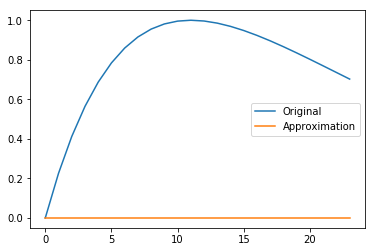

In [53]:
compare_graphs(0)

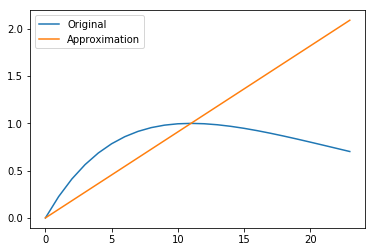

In [54]:
compare_graphs(1)

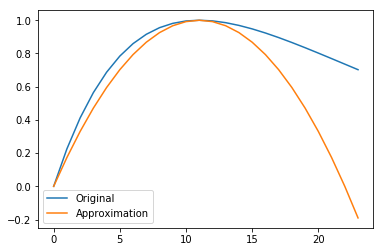

In [55]:
compare_graphs(2)

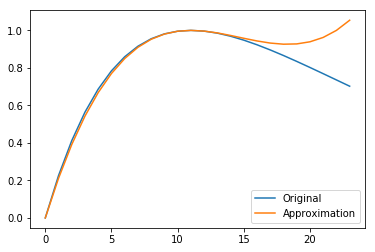

In [56]:
compare_graphs(3)

That last one looks pretty promising. On the range $0 < x < 15$ it looks very promising, and we can probably use a piecewise function to approximate it better when $x > 15$

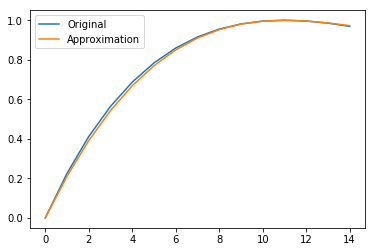

In [58]:
compare_graphs(3, start=0, end=15)

In [61]:
def approx_alpha(x):
    return positive_alpha_with_taylor(3, x)

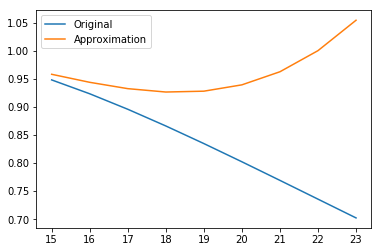

In [65]:
compare_graphs(3, start=15, end=24)

In [67]:
m = (positive_alpha(24) - positive_alpha(15)) / (24 - 15)
x0 = 15
y0 = positive_alpha(15)
def linear_approximator(x):
    return m * (x - x0) + y0

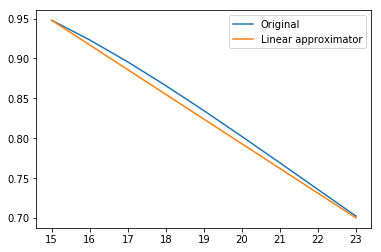

In [68]:
xs = range(15, 24)
ys_old = list(map(positive_alpha, xs))
ys_new = list(map(linear_approximator, xs))
plt.plot(xs, ys_old, label="Original")
plt.plot(xs, ys_new, label="Linear approximator")
plt.legend()
plt.show()

In [69]:
print(m, x0, y0)

-0.03096833882975574 15 0.9479235387257438


In [13]:
def alpha(t):
    if t < 0:
        return 0
    elif t > 15:
        return -0.03096833882975574 * (t - 15) + 0.9479235387257438
    else:
        v = 1 - (t/timeDecay)
        return (t/timeDecay) * (1 + v + v*v/2)

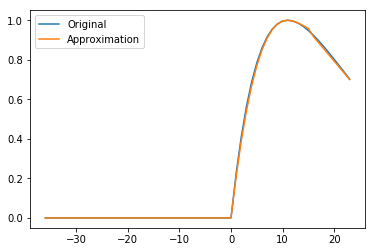

In [14]:
xs = list(range(-36, 24))
ys_old = list(map(alpha, xs))
ys_new = list(map(alpha_new, xs))
plt.plot(xs, ys_old, label="Original")
plt.plot(xs, ys_new, label="Approximation")
plt.legend()
plt.show()